# Deploying a Machine Learning Model

## 5.1 Intro / Session Overview

In This session we talked about the earlier model we made in chapter 3 for churn prediction.
This chapter containes the deployment of the model. If we want to use the model to predict new values without running the code, There's a way to do this. The way to use the model in different machines without running the code, is to deploy the model in a server (run the code and make the model). After deploying the code in a machine used as server we can make some endpoints (using api's) to connect from another machine to the server and predict values.

To deploy the model in a server there are some steps:

- After training the model save it, to use it for making predictions in future (session 02-pickle).
- Make the API endpoints in order to request predictions. (session 03-flask-intro and 04-flask-deployment)
- Some other server deployment options (sessions 5 to 9)

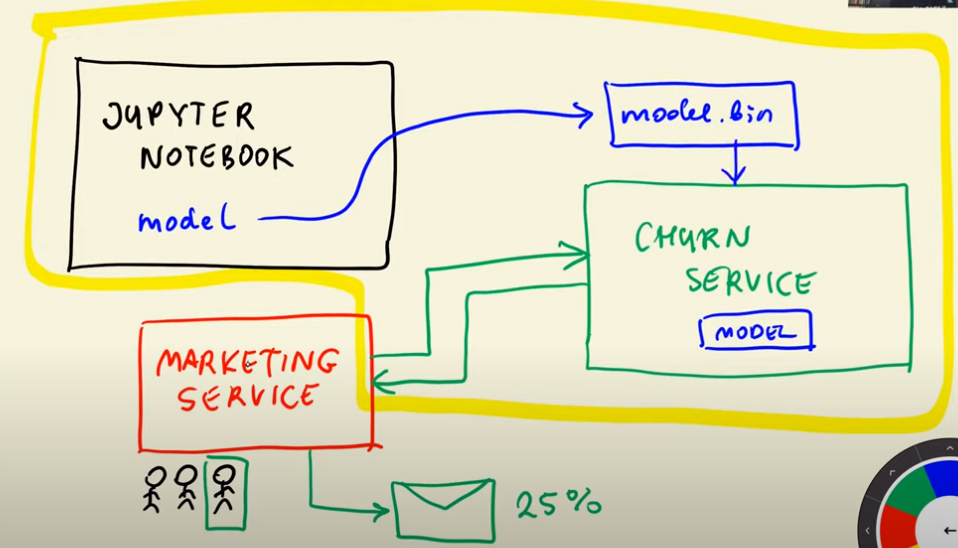

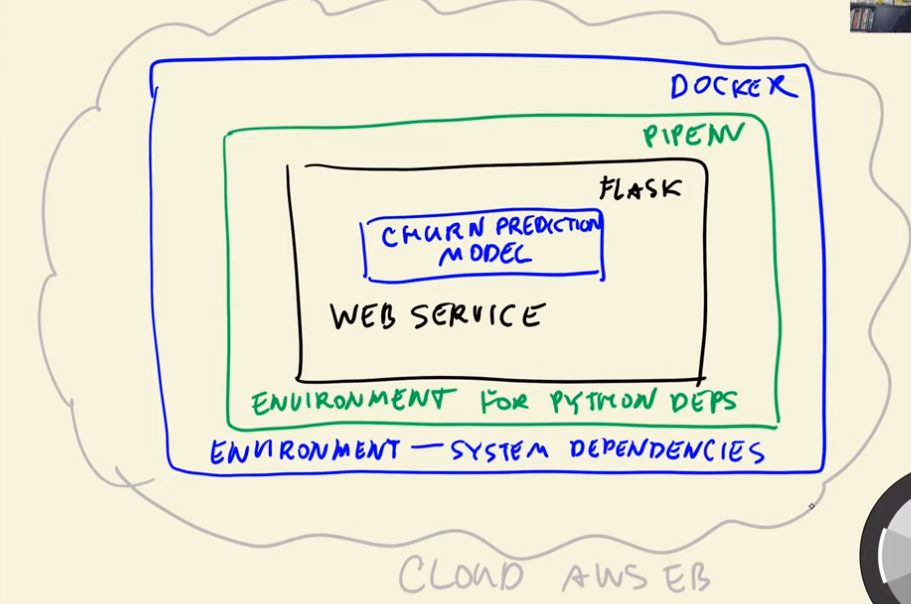

## 5.2 Saving and loading the model

* Saving the model to pickle
* Loading the model from pickle
* Turning our notebook into Python script

In this session we'll cover the idea "How to use the model in future without training and evaluating the code"

- To save the model we made before there is an option using the pickle library:
    - First install the library with the command pip install pickle-mixin if you don't have it.
    - After training the model and being the model ready for prediction process use this code to save the model for later.

- To save the model we made before there is an option using the pickle library:    
    - In the code above we'll making a binary file named model.bin and writing the dict_vectorizer for one hot encoding and model as array in it. (We will save it as binary in case it wouldn't be readable by humans)
    - To be able to use the model in future without running the code, We need to open the binary file we saved before.

- To save the model we made before there is an option using the pickle library:    
    - With unpacking the model and the dict_vectorizer, We're able to again predict for new input values without training a new model by re-running the code.

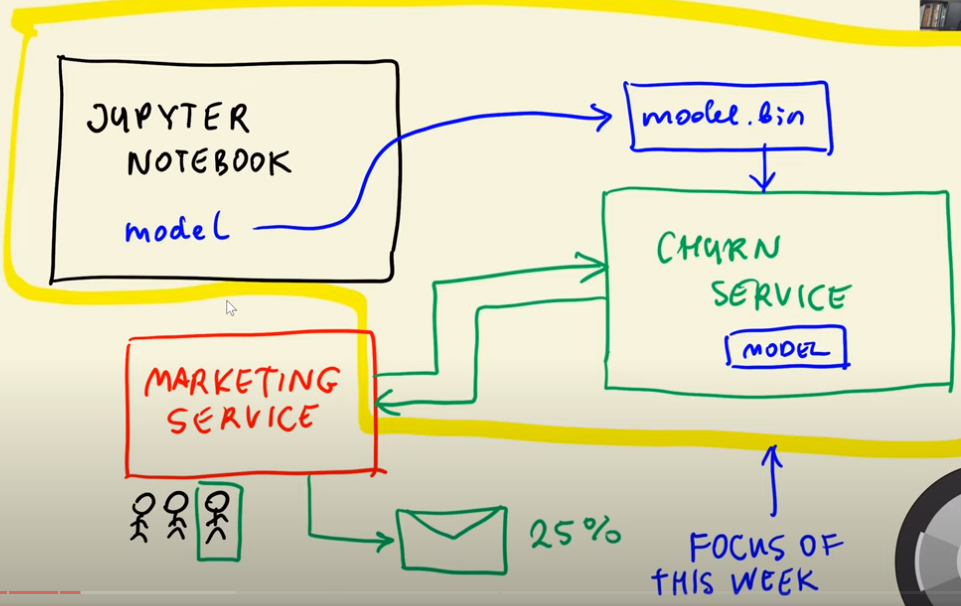

## 5.3 Web services: introduction to flask

- Writing a simple ping/pong app
- Querying it with ``curl`` and browser


In this session we talked about what is a web service and how to create a simple web service.

- What is actually a web service
    - A web service is a method used to communicate between electronic devices.
    - There are some methods in web services we can use it to satisfy our problems. Here below we would list some.
        - **GET**: GET is a method used to retrieve files, For example when we are searching for a cat image in google we are actually requesting cat images with GET method.
        - **POST**: POST is the second common method used in web services. For example in a sign up process, when we are submiting our name, username, passwords, etc we are posting our data to a server that is using the web service. (Note that there is no specification where the data goes)
        - **PUT**: PUT is same as POST but we are specifying where the data is going to.
        - **DELETE**: DELETE is a method that is used to request to delete some data from the server.
        - For more information just google the HTTP methods, You'll find useful information about this.
- To create a simple web service, there are plenty libraries available in every language. Here we would like to introduce Flask library in python.
    - If you haven't installed the library just try installing it with the code ``pip install Flask``
    - To create a simple web service just run the code below:

   - With the code above we made a simple web server and created a route named ping that would send pong string.
   - To test it just open your browser and search localhost:9696/ping, You'll see that the 'PONG' string is received. Congrats You've made a simple web server 🥳.
    
To use our web server to predict new values we must modify it. See how in the next session.

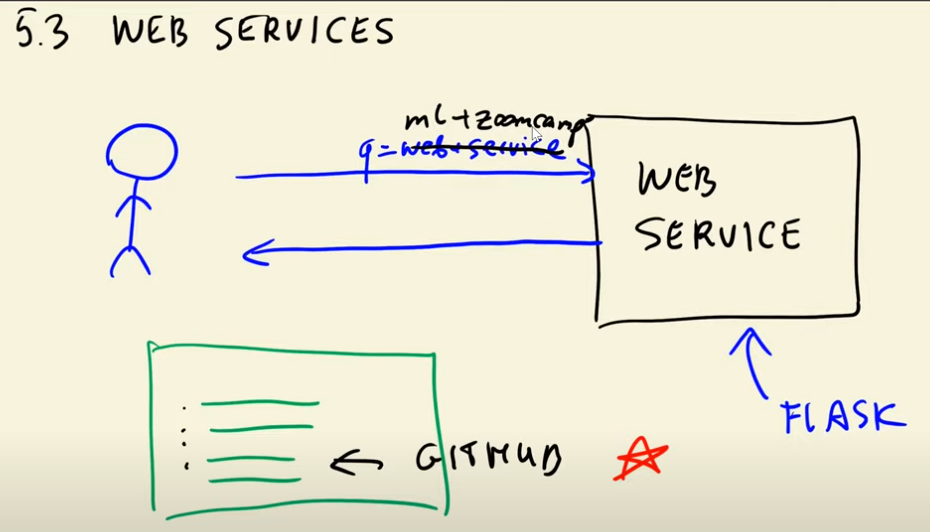

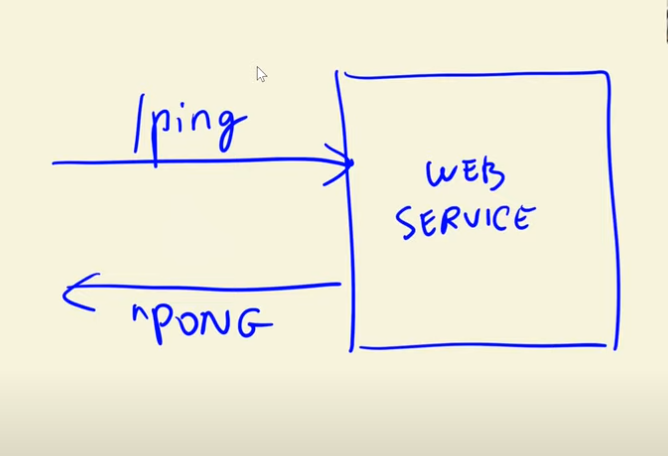

## 5.4 Serving the churn model with Flask

- Wrapping the predict script into Flask app
- Querying it with ``request``
- Preparing for production: gunicorn
- Running it on Windows with waitress

In this session we talked about implementing the functionality of prediction to our churn web service and how to make it usable in development environment.

- To make the web service predict the churn value for each customer we must modify the code in session 3 with the code we had in previous chapters. Below we can see how the code works in order to predict the churn value.
- In order to predict we need to first load the previous saved model and use a prediction function in a special route.
    - To load the previous saved model we use the code below:

   - As we had earlier to predict a value for a customer we need a function like below:

   - Then at last we make the final function used for creating the web service.

   - The whole code above is available in this link: [churn_serving.py](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-05-deployment/churn_serving.py)
   - At last run your code. To see the result we can't use a simple request in web browser, because we are expecting a POST request in our app. We can run the code below to post customer data as json and see the response

- Until here we saw how we made a simple web server that predicts the churn value for every user. When you run your app you will see a warning that it is not a WGSI server and not suitable for production environmnets. To fix this issue and run this as a production server there are plenty of ways available.
    - One way to create a WSGI server is to use gunicorn. To install it use the command pip install gunicorn, And to run the WGSI server you can simply run it with the command gunicorn --bind 0.0.0.0:9696 churn:app. Note that in churn:app the name churn is the name we set for our the file containing the code app = Flask('churn')(for example: churn.py), You may need to change it to whatever you named your Flask app file.
    - Windows users may not be able to use gunicorn library because windows system do not support some dependecies of the library. So to be able to run this on a windows machine, there is an alternative library waitress and to install it just use the command pip install waitress.
    - to run the waitress wgsi server use the command waitress-serve --listen=0.0.0.0:9696 churn:app.
    - To test it just you can run the code above and the results is the same.
- So until here you were able to make a production server that predict the churn value for new customers. In the next session we can see how to solve library version conflictions in each machine and manage the dependencies for production environments.

## 5.5 Python virtual environment: Pipenv

- Dependancy and environment management
- Why we need virtual environment
- Installing Pienv
- Installing libraries with Pipenv
- Running things with Pipenv

In this session we're going to make virtual environment for our project. So Let's start this session to get to know what is a virtual environment and how to make it.

- Every time we're running a file from a directory we're using the executive files from a global directory. For example when we install python on our machine the executable files that are able to run our codes will go to somewhere like /home/username/python/bin/ for example the pip command may go to /home/username/python/bin/pip.
- Sometimes the versions of libraries conflict (the project may not run or get into massive errors). For example we have an old project that uses sklearn library with the version of 0.24.1 and now we want to run it using sklearn version 1.0.0. We may get into errors because of the version conflict.
    - To solve the conflict we can make virtual environments. Virtual environment is something that can seperate the libraries installed in our system and the libraries with specified version we want our project to run with. There are a lot of ways to create a virtual environments. One way we are going to use is using a library named pipenv.
    - pipenv is a library that can create a virutal environment. To install this library just use the classic method pip install pipenv.
    - After installing pipenv we must to install the libraries we want for our project in the new virtual environment. It's really easy, Just use the command pipenv instead of pip. pipenv install numpy sklearn==0.24.1 flask. With this command we installed the libraries we want for our project.
    - Note that using the pipenv command we made two files named Pipfile and Pipfile.lock. If we look at this files closely we can see that in Pipfile the libraries we installed are named. If we specified the library name, it's also specified in Pipfile.
    - In Pipfile.lock we can see that each library with it's installed version is named and a hash file is there to reproduce if we move the environment to another machine.
    - If we want to run the project in another machine, we can easily installed the libraries we want with the command pipenv install. This command will look into Pipfile and Pipfile.lock to install the libraries with specified version.
    - After installing the required libraries we can run the project in the virtual environment with pipenv shell command. This will go to the virtual environment's shell and then any command we execute will use the virtual environment's libraries.
- Installing and using the libraries such as gunicorn is the same as the last session.
- Until here we made a virtual environment for our libraries with a required specified version. To seperate this environment more, such as making gunicorn be able to run in windows machines we need another way. The other way is using Docker. Docker allows us to seperate everything more than before and make any project able to run on any machine that support Docker smoothly.
- In the next session we'll go in detail of how Docker works and how to use it.

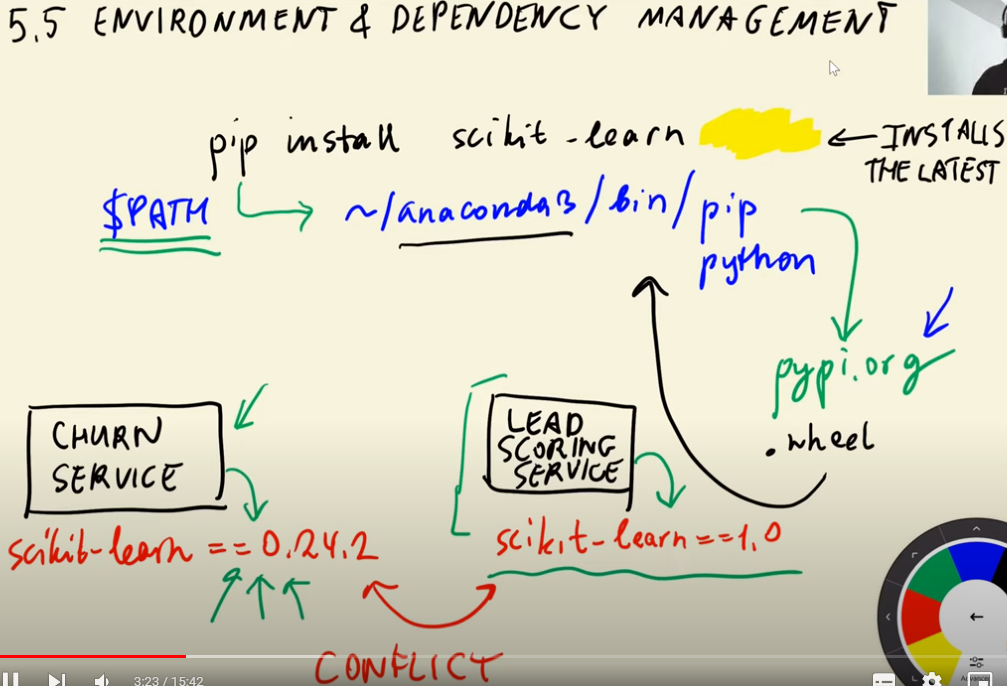

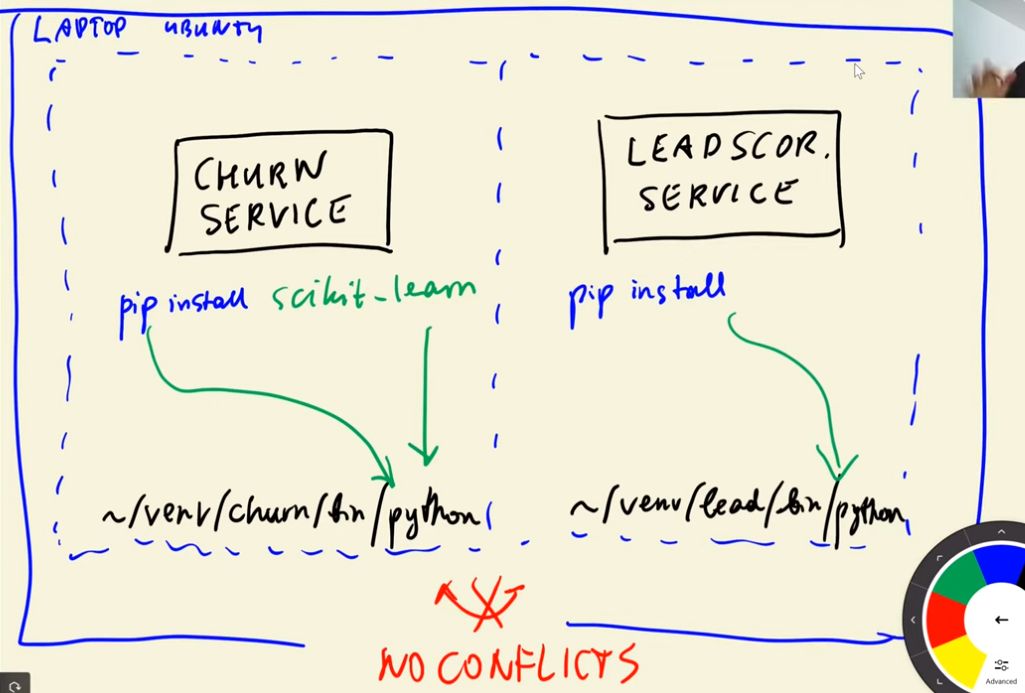

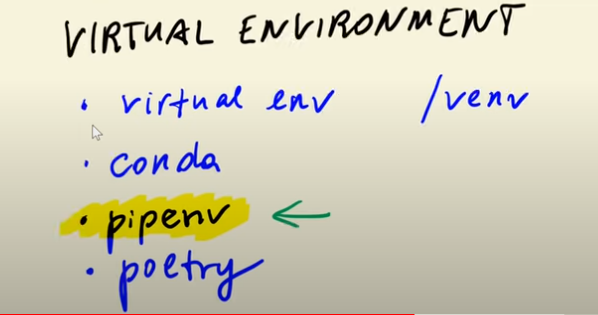

In [2]:
import sklearn

In [3]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [5]:
import flask

In [6]:
flask. __version__

'2.2.2'